# [Tutorial de SciPy](https://www.youtube.com/watch?v=jmX4FOUEfgU&ab_channel=Mr.PSolver)

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['science', 'notebook', 'grid'])

***

## Básicos

### Otimização

Descobrir o mínimo da função $f(x) = (x - 3)^2$

In [2]:
from scipy.optimize import minimize

def f(x):
    return (x - 3) ** 2

result = minimize(f, 2)
result

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])

Descubra o mínimo da função $f(x, y) = (x - 1)^2 + (y - 2.5)^2$ restrita à:

$$ x - 2y + 2 \geq 0 $$
$$- x - 2y + 6 \geq 0 $$
$$- x + 2y + 2 \geq 0 $$
$$x \geq 0 $$
$$y \geq 0 $$

- A interface do scipy exige que a restrições sejam escritas como $g(x) \geq 0$

In [3]:
def f(vec):
    return (vec[0] - 1)**2 + (vec[1] - 2.5)**2

cons = ({'type': 'ineq', 'fun': lambda vec: vec[0] - 2 * vec[1] + 2},
        {'type': 'ineq', 'fun': lambda vec: - vec[0] - 2 * vec[1] + 6},
        {'type': 'ineq', 'fun': lambda vec: - vec[0] + 2 * vec[1] + 2})

bounds = ((0, None), (0, None))

result = minimize(f, (2, 0), bounds=bounds, constraints=cons)
result

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

- Para olhar a documentação completa de uma função dentro de um notebook, use `nome_da_função?`

In [ ]:
minimize?

### Interpolação

Do dicionário: *"Processo através do qual é possível determinar o valor de uma função, dentro de um intervalo, a partir do conhecimento dos valores extremos desse intervalo"*.

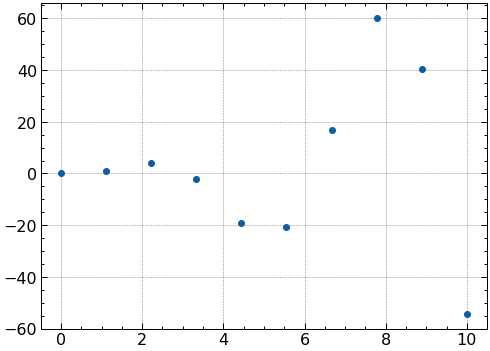

In [4]:
# Valores 'observados' (podem ser obtidos através de uma amostra, por exemplo, 
# mas aqui eles foram criados)
x = np.linspace(0, 10, 10)
y = x ** 2 * np.sin(x)
plt.scatter(x, y)

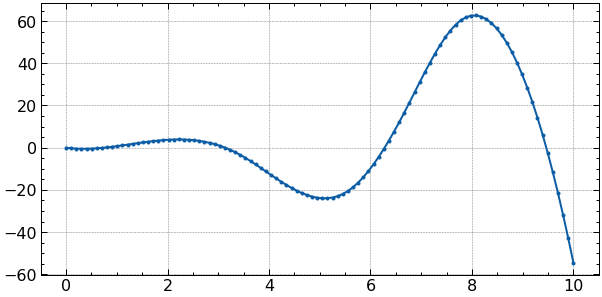

In [5]:
from scipy.interpolate import interp1d

plt.figure(figsize=(10, 5))

f = interp1d(x, y, kind='cubic') # Retorna uma função que aproxima os pontos
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

plt.plot(x_dense, y_dense, "o-", markersize=3)
plt.show()

### Ajuste de Curva

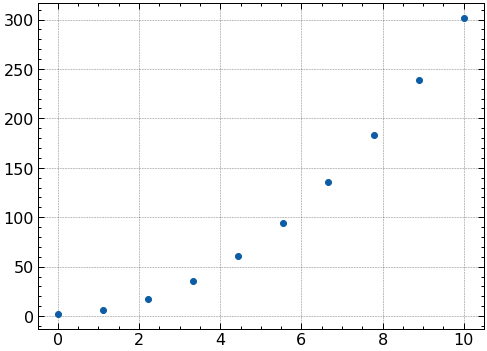

In [6]:
from scipy.optimize import curve_fit

# Dados fake
x = np.linspace(0, 10, 10)
y = 3 * (x ** 2) + 2

plt.scatter(x, y)
plt.show()

- Iremos ajustar os dados acima a uma curva quadrática $y = ax^2 + b$ para conseguir os parâmetros $a$ e $b$.

In [29]:
def func(x, a, b):
    return a * (x**2) + b


popt, pcov = curve_fit(func, x, y, p0=(1, 1))

print(fr"a = {popt[0]} e b = {popt[1]}")
print(pcov)

a = 3.0 e b = 1.9999999999999967
[[ 4.13297331e-34 -1.45419433e-32]
 [-1.45419433e-32  9.65872308e-31]]


- Como podemos ver, a função retornou uma estimativa para os parâmetros $a$ e $b$ e também a variância dessas estimativas (diagonal da matriz acima).

***

## Cálculo 

### Derivadas

- Diferentemente da biblioteca Numpy, que usa pontos de dados para avaliar a derivada de uma função, o SciPy avalia a derivada através de uma forma funcional específica.

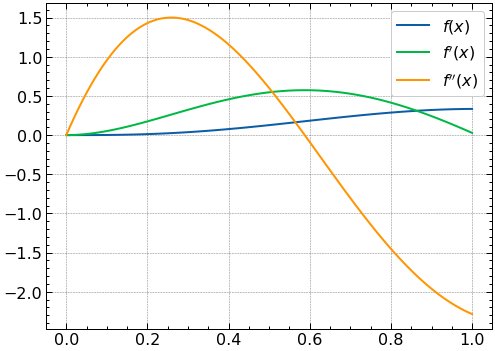

In [7]:
from scipy.misc import derivative

def f(x):
    return (x**2) * np.sin(2 * x) * np.exp(-x)

x = np.linspace(0, 1, 100)
f_i = derivative(f, x, dx=1e-6)
f_ii = derivative(f, x, dx=1e-6, n=2)

plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, f_i, label="$f'(x)$")
plt.plot(x, f_ii, label="$f''(x)$")
plt.legend()
plt.show()

### Integrais

- Integrais simples:

$$\int_{0}^{1} x^2 \times \sin{2x} \times e^{-x} dx$$

In [37]:
from scipy.integrate import quad

integrand = lambda x: (x**2) * np.sin(x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

print(integral, integral_error, sep="\n")

0.10246777930717413
1.1376208786903388e-15


- Integrais duplas:

$$\int_{0}^{1} \int_{-x}^{x^2} \sin{x + y^2}dydx$$

In [38]:
from scipy.integrate import dblquad
integrand = lambda x, y: np.sin(x + y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2

integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

print(integral, integral_error, sep="\n")

0.315802507240474
1.5634600713498928e-14


***

## Estatística

- Exemplo 01: Distribuição $\beta$

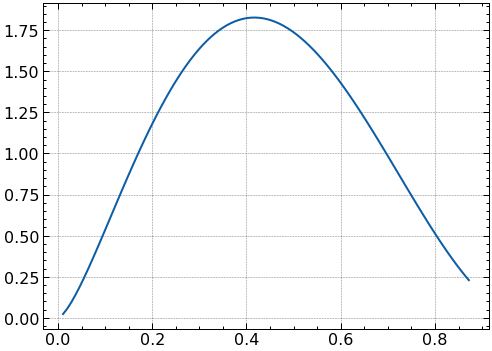

In [11]:
from scipy.stats import beta

a, b = 2.5, 3.1
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

# Plotando a distribuição
ini = beta.ppf(0.0001, a, b)
end = beta.ppf(0.99, a, b)

x = np.linspace(ini, end, 100)
y = beta.pdf(x, a, b)

plt.plot(x, y)
plt.show()

- Exemplo 02: Distribuição Normal (Gaussiana)

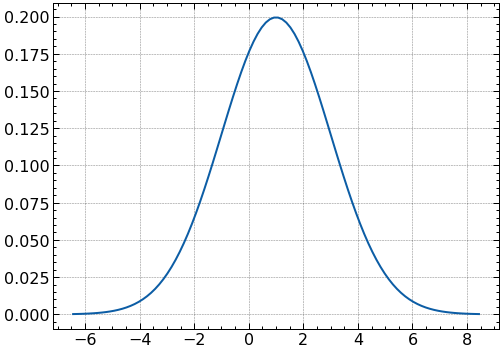

In [16]:
from scipy.stats import norm

mu = 1
sigma = 2
mean, var = norm.stats(loc=mu, scale=sigma, moments='mv')

# Plotando a distribuição
ini = norm.ppf(0.0001, mu, sigma)
end = norm.ppf(0.9999, mu, sigma)

x = np.linspace(ini, end, 100)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y)
plt.show()